#Planning

To devide the work between the three people working on this project we first have to make a general idea of what needs to be done.

-Gather A set of Poems for inspiration

*   https://www.poetry.com/
*   https://www.poetryfoundation.org/
*   https://www.poemhunter.com/
*   look for other sources.



-Implement a Poem Generator

*   Gather different templates for generators
*   think about drawback and advantages per template
*   What would be the stopping criteria
*   Are there other goals we want to achieve?
*   http://tinysubversions.com/notes/sorting-bot/
  
  

-Present poem
* Gather different presentation methods
* Decide which one, or ones to use.

#Gathering Poems

https://www.kaggle.com/datasets/ultrajack/modern-renaissance-poetry/data
###https://www.kaggle.com/datasets/johnhallman/complete-poetryfoundationorg-dataset (chosen)

The complete poetry foundation dataset, which is published on Kaggle, was chosen as the data lake for model training and testing. Such selection is based on three insprations and reasons.



1.   Comprehensiveness. The complete poetry foundation dataset is a comprehensive logbook of poems, containing various poems written by different poets. The dataset contains approximately 15K poems of various styles, making it one of the most comprehensive dataset dedicated for poems that are available. With rich contents, the model is likely to better learn to generate poems and reduce the risk of overfitting or underfitting.

2.   Various styles. The collection holds poems of distinct styles, which make it possible for the generator to learn different styles and thus generating poems that are lively instead of a fixed pattern. Other datasets have fewer genres which limits the variablity of the training data. We believe variation is one of the core characteristics of poems, regardless classical or modern.

3.   Understanding Poetic Structure. Poems often follow specific structural rules, such as rhyming schemes or meter. Poems in the selected dataset shows positive following of structure rules, which we believe will enable to generator to learn from and eventually produce poems instead of meaningful plain texts.



## Advantages and disadvantage of each set

#Implementing Generator

##Gathering Models

First we have to orient on the different kind of models. to do this we look up a few existing ones and gather them together so we can more easily define the advantages and disadvantages of each one. The gathered models are the following:

*   Templates (Stochastic Texts,A House of Dust) https://brightspace.universiteitleiden.nl/content/enforced/239785-4383COMCRY_2324_S1/Tutorial%202%20Templates.html?ou=239785&d2l_body_type=3
*   Markov Decision Process https://pymdptoolbox.readthedocs.io/en/latest/
*   Contect free/sensitive grammar https://brightspace.universiteitleiden.nl/content/enforced/239785-4383COMCRY_2324_S1/Tutorial%203%20Grammars.html?ou=239785&d2l_body_type=3
*   Bag of words (word2vec) https://github.com/OlgaChernytska/word2vec-pytorch
*   Recurrent Neural Networks (RNN) https://blog.floydhub.com/a-beginners-guide-on-recurrent-neural-networks-with-pytorch/
*   GRU and LSTM Models https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
*   Huggingface GPT2 https://huggingface.co/gpt2
*   Bidirectional Encoder Representations from Transformers (BERT) https://neptune.ai/blog/how-to-code-bert-using-pytorch-tutorial







##Advantages and Disadvantags

To decide wich model we want to use for our poem generator we next have to sum up the advantages and disadvantages of each one. The models are sorted from easy to implement to more difficult to implement while at the same time sorted from "worse" at generating poems to "better" at generating poems. This is because the later models use more and better techniques which results in more structured, but at the same time more original poems.

*   Templates (Stochastic Texts, A House of Dust) :
  *   Pros: Very easily implemented.
  *   Cons: The Poem can only be as creative as the template allowes. There is no coherency between the chosen words unless one specificaly hard codes this. You cant change the length of the poem. The sentence might not flow nicely, or make no sense at all.

*   Markov Decision Process:
  *   Pros: Makes sense by humans so it is easy to fine-tune parameters. Will look more like structured sentences.
  *   Cons: Difficult to get gramatically correct sentences or sentences that make sense. One has to design the structures from which the sentences can be made which can take a lot of time.

*   Contect free/sensitive grammar:
  *   Pros: Makes sense by humans so it is easy to fine-tune parameters. Will look more like structured sentences. Might be a bit more difficult to follow then MDP but can get to the same results with some additional features.
  *   Cons: Difficult to get gramatically correct sentences or sentences that make sense. One has to design the structures from which the sentences can be made which can take a lot of time.

*   Bag of words (word2vec) :
  *   Pros: words with similair meanings are close to each other in chances of being picked. This will cause scentenses to make more sense than when using the abovementioned models.
  *   Cons: This is only a tool to guess words in a given context, one still needs to write the context or jump-start the model.

*   Recurrent Neural Networks (RNN) :
  *   Pros: Can in theory make original coherent poems if the network and dataset is big enough
  *   Cons: If scentenses become longer they will become less coherent because of vanishing gradients. Need to be trained. Can only look backwards to generate new words.

*   GRU and LSTM Models :
  *   Pros: Can better remember coherency of a scentence when they get longer.
  *   Cons: More difficult to implement than RNN. Difficult to paralellize. Still bad with context. Can only look backwards to generate new words.

*   Huggingface GPT2 :
  *   Pros: Can define how sentences relate to each other and use this to make a coherent story.
  *   Cons: Requires a large dataset to train. Blackbox model makes it difficult to understand hyper-parameters. Can only look backwards to generate new words.

*   Bidirectional Encoder Representations from Transformers (BERT) :
  *   Pros: Can define how sentences relate to each other and use this to make a coherent story. Unidirectional.
  *   Cons: Requires a large dataset to train. Blackbox model makes it difficult to understand hyper-parameters. More difficult than GPT.




##Stopping Criteria

For our poems we want the model to have a chance to stop generating at the end of each sentence. This chance will start of very low, and then increase after each sentence until a certain sentence limit is reached. This will result in a bell-curve like spreak of poems. Some will be shorter than average, some will be longer, but on average most will have the same length.

##Extra goals

For our generator we want it to be able to write at least coherent sentences. Sentences that are connected and make a coherent story would be a nice extra.
This Limits our choices to a GPT or a BERT model.

#implementation

The final choice for our model is a GPT2 model. We looked online for tutorials and found one that we thought was doable to implement. Most of the code comes from the following website: https://towardsdatascience.com/how-to-fine-tune-gpt-2-for-text-generation-ae2ea53bc272. This we will then later change and/or tweak to our own requirements.

## Data Loading

To train the model we first need to connect to the dataset. This dataset has to be uploaded to you google drive in the same folder as the 'dataset_path' path.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

In [ ]:
dataset_path = '/content/drive/MyDrive/kaggle_poem_dataset.csv'
df = pd.read_csv(dataset_path,index_col=0)
df.head()

,Author,Title,Poetry Foundation ID,Content
0,Wendy Videlock,!,55489,"Dear Writers, I’m compiling the first in what ..."
1,Hailey Leithauser,0,41729,"Philosophic\nin its complex, ovoid emptiness,\..."
2,Jody Gladding,1-800-FEAR,57135,We'd like to talk with you about fear t...
3,Joseph Brodsky,1 January 1965,56736,The Wise Men will unlearn your name.\nAbove yo...
4,Ted Berrigan,3 Pages,51624,For Jack Collom\n10 Things I do Every Day\n\np...


For our model we only need the poem text so we drop all other columns

In [ ]:
df = df.drop(columns=['Title','Author','Poetry Foundation ID'])
df.head()

,Content
0,"Dear Writers, I’m compiling the first in what ..."
1,"Philosophic\nin its complex, ovoid emptiness,\..."
2,We'd like to talk with you about fear t...
3,The Wise Men will unlearn your name.\nAbove yo...
4,For Jack Collom\n10 Things I do Every Day\n\np...


Next we need to pre-process the poems, making sure they are not too long and the 'endline' characters are replaced with spaces. This makes sure the model will be more robust.

In [ ]:
df['Content']= df['Content'].str.replace('\n',' ')
df = df[df['Content'].apply(lambda x: len(x.split(' ')) < 350)]
df

,Content
0,"Dear Writers, I’m compiling the first in what ..."
1,"Philosophic in its complex, ovoid emptiness, a..."
2,We'd like to talk with you about fear t...
3,The Wise Men will unlearn your name. Above you...
4,For Jack Collom 10 Things I do Every Day play...
...,...
15647,"It’s too cold to smoke outside, but if you com..."
15648,if you like let the body feel all its own evol...
15649,(A fortune cookie) Ominous inscrutable Chinese...
15650,1 Our last night in the house was not our last...


The title of the column is renamed for better understanding in later use.

In [ ]:
df = df.rename(columns={'Content':'Poems'})
df = df.dropna()
df

,Poems
0,"Dear Writers, I’m compiling the first in what ..."
1,"Philosophic in its complex, ovoid emptiness, a..."
2,We'd like to talk with you about fear t...
3,The Wise Men will unlearn your name. Above you...
4,For Jack Collom 10 Things I do Every Day play...
...,...
15647,"It’s too cold to smoke outside, but if you com..."
15648,if you like let the body feel all its own evol...
15649,(A fortune cookie) Ominous inscrutable Chinese...
15650,1 Our last night in the house was not our last...


A small test is done to see if everything looks correct when taking a sample of the bigger dataset.

In [ ]:
test_set = df.sample(n = 200)
df = df.loc[~df.index.isin(test_set.index)]

test_set = test_set.reset_index()
df = df.reset_index()

#test_set['True_end_lyrics'] = test_set['Lyric'].str.split().str[-20:].apply(' '.join)
#test_set['Lyric'] = test_set['Lyric'].str.split().str[:-20].apply(' '.join)

## GTP2 Model

First the right packages have to be installed

In [ ]:
!pip install transformers[torch]
from transformers import pipeline, set_seed

In [ ]:
import numpy as np
import random
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import GPT2Tokenizer, GPT2LMHeadModel, AdamW, get_linear_schedule_with_warmup
from tqdm import tqdm, trange
import torch.nn.functional as F
import csv

Next the poems have to be tokenized so the sentences are in a format which can be used as input by the model.

In [ ]:
class PoemsDataset(Dataset):
    def __init__(self, control_code, truncate=False, gpt2_type="gpt2", max_length=1024):

        self.tokenizer = GPT2Tokenizer.from_pretrained(gpt2_type)
        self.poems = []

        for row in df['Poems']:
          self.poems.append(torch.tensor(
                self.tokenizer.encode(f"<|{control_code}|>{row[:max_length]}<|endoftext|>")
            ))
        if truncate:
            self.poems = self.poems[:20000]
        self.poems_count = len(self.poems)

    def __len__(self):
        return self.poems_count

    def __getitem__(self, item):
        return self.poems[item]

dataset = PoemsDataset(df['Poems'], truncate=True, gpt2_type="gpt2")

Now we can aquire a pre-trained model. This is done in batches since the GPT2 model is very big.




In [ ]:
#Get the tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

#Accumulated batch size (since GPT2 is so big)
def pack_tensor(new_tensor, packed_tensor, max_seq_len):
    if packed_tensor is None:
        return new_tensor, True, None
    if new_tensor.size()[1] + packed_tensor.size()[1] > max_seq_len:
        return packed_tensor, False, new_tensor
    else:
        packed_tensor = torch.cat([new_tensor, packed_tensor[:, 1:]], dim=1)
        return packed_tensor, True, None

### Fine Tune the model

After having aquired the model we can fine tune it so its output better represents the poems that we try to make and their requirements.

In [ ]:
def train(
    dataset, model, tokenizer,
    batch_size=16, epochs=5, lr=2e-5,
    max_seq_len=400, warmup_steps=200,
    gpt2_type="gpt2", output_dir=".", output_prefix="wreckgar",
    test_mode=False,save_model_on_epoch=False,
):
    acc_steps = 100
    device=torch.device("cuda")
    model = model.cuda()
    model.train()

    optimizer = AdamW(model.parameters(), lr=lr)
    scheduler = get_linear_schedule_with_warmup(
        optimizer, num_warmup_steps=warmup_steps, num_training_steps=-1
    )

    train_dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
    loss=0
    accumulating_batch_count = 0
    input_tensor = None

    for epoch in range(epochs):

        print(f"Training epoch {epoch}")
        print(loss)
        for idx, entry in tqdm(enumerate(train_dataloader)):
            (input_tensor, carry_on, remainder) = pack_tensor(entry, input_tensor, 768)

            if carry_on and idx != len(train_dataloader) - 1:
                continue

            input_tensor = input_tensor.to(device)
            outputs = model(input_tensor, labels=input_tensor)
            loss = outputs[0]
            loss.backward()

            if (accumulating_batch_count % batch_size) == 0:
                optimizer.step()
                scheduler.step()
                optimizer.zero_grad()
                model.zero_grad()

            accumulating_batch_count += 1
            input_tensor = None
        if save_model_on_epoch:
            torch.save(
                model.state_dict(),
                os.path.join(output_dir, f"{output_prefix}-{epoch}.pt"),
            )
    return model

Having set the parameters and connected the dataset we just have to train the model with the following line of code.

In [ ]:
model = train(dataset, model, tokenizer)

Training can take a long time, so saving a trained model comes in handy when you dont want to retrain your model every time you want it to generate poems.

In [ ]:
torch.save(model, '/content/drive/MyDrive/checkpoint_whole.pth')

### Generate the poem

when you have a saved model, you first have to load it back into the data.

In [ ]:
model = torch.load('/content/drive/MyDrive/checkpoint_whole.pth')

After having loaded the model  we can generate the poem. Right now it will always generate an output of 50 words, which can manually be hightened or lowered. Because it is difficult to see in code when a scentence is finished we chose to manually prune unfinished sentences.

In [ ]:
def generate(
    model,
    tokenizer,
    prompt,
    entry_count=1, ####
    entry_length=50, #####maximum number of words
    top_p=0.8,
    temperature=1.,
):
    model.eval()
    generated_num = 0
    generated_list = []

    filter_value = -float("Inf")

    with torch.no_grad():

        for entry_idx in trange(entry_count):

            entry_finished = False
            generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0)

            for i in range(entry_length):
                outputs = model(generated, labels=generated)
                loss, logits = outputs[:2]
                logits = logits[:, -1, :] / (temperature if temperature > 0 else 1.0)

                sorted_logits, sorted_indices = torch.sort(logits, descending=True)
                cumulative_probs = torch.cumsum(F.softmax(sorted_logits, dim=-1), dim=-1)

                sorted_indices_to_remove = cumulative_probs > top_p
                sorted_indices_to_remove[..., 1:] = sorted_indices_to_remove[
                    ..., :-1
                ].clone()
                sorted_indices_to_remove[..., 0] = 0

                indices_to_remove = sorted_indices[sorted_indices_to_remove]
                logits[:, indices_to_remove] = filter_value

                next_token = torch.multinomial(F.softmax(logits, dim=-1), num_samples=1)
                generated = torch.cat((generated, next_token), dim=1)

                if next_token in tokenizer.encode("<|endoftext|>"):
                    entry_finished = True

                if entry_finished:

                    generated_num = generated_num + 1

                    output_list = list(generated.squeeze().numpy())
                    output_text = tokenizer.decode(output_list)
                    generated_list.append(output_text)
                    break

            if not entry_finished:
              output_list = list(generated.squeeze().numpy())
              output_text = f"{tokenizer.decode(output_list)}<|endoftext|>"
              generated_list.append(output_text)

    return generated_list

#Function to generate multiple sentences. Test data should be a dataframe
def text_generation(test_data):
  generated_poems = []
  for i in range(len(test_data)):
    if test_data['Poems'][i]:
      x = generate(model, tokenizer, test_data['Poems'][i], entry_count=1)
    generated_poems.append(x)
  return generated_poems

#Run the functions to generate the lyrics
#generated_poems = text_generation(test_set)

#### examples

Next follow some examples of inputs which can be given to the model, each having their own unique output every time you run one of these examples.

In [ ]:
text = "Classical."

x = generate(model.to('cpu'), tokenizer, text, entry_count=1)
x

In [ ]:
text = "Write me an classical poem."

x = generate(model.to('cpu'), tokenizer, text, entry_count=1)
x

In [ ]:
text = "A moderm Poem Looks like this:"

x = generate(model.to('cpu'), tokenizer, text, entry_count=1)
x

In [ ]:
text = "A Medival Poem Looks like this:"

x = generate(model.to('cpu'), tokenizer, text, entry_count=1)
x

In [ ]:
text = "The most creative poem in the world is written as follows:"

x = generate(model.to('cpu'), tokenizer, text, entry_count=1)
x

In [ ]:
text = "The most interesing poem in the world is written as follows:"

x = generate(model.to('cpu'), tokenizer, text, entry_count=1)
x

In [ ]:
text = "The most lovely poem about winter is writtem as follows:"

x = generate(model.to('cpu'), tokenizer, text, entry_count=1)
x

! It should be noted that the model is based on a pretrained language model where the training data is far betond only poem. Although we further fine-tuned it using the complete poetry foundation dataset, it may still produce non-poem text.

To reduce the possiblity of such situations, it is recommended to include the keyword "poem" when inputting command, and we suggest follow the same format as we did above, for example, "The most adj. poem about noun. is written as follows:"

It works and generate poems we want! However, it is stored and displayed in a way that humans are not easy to see and preceive. To better show the poem, we can split the string with any comma or period, and reformat it in a way that most poems do.

In [ ]:
poem_string = x[0]
# Splitting the poem using periods and commas
poem_lines = [line.strip() for line in poem_string.split('.') if line]
poem_lines = [line + '.' for line in poem_lines]

formatted_lines = []
for line in poem_lines:
    formatted_lines.extend([subline.strip() for subline in line.split('\n') if subline])

for line in formatted_lines:
    print(line)

Now it looks better!

Below are some other poems generated.

In [ ]:
text = "The most exciting poem about city is writtem as follows:"

x = generate(model.to('cpu'), tokenizer, text, entry_count=1)

poem_string = x[0]
# Splitting the poem using periods and commas
poem_lines = [line.strip() for line in poem_string.split('.') if line]
poem_lines = [line + '.' for line in poem_lines]

formatted_lines = []
for line in poem_lines:
    formatted_lines.extend([subline.strip() for subline in line.split('\n') if subline])

for line in formatted_lines:
    print(line)

100%|██████████| 1/1 [00:18<00:00, 18.34s/it]

The most exciting poem about city is writtem as follows:
When you hit the buzzer
I'll always call out "town" like my blue-bellied cat on the corner of City Road and May Road
That's the sense of awakening from the black emptiness of The Deep Waste
That morning<|endoftext|>.


#Presenting poem

### Emoji poems (with poem voiceover)
The inspration of this presenting method comes from abstractism, a popular expression style emerging post WW2. This style advocate for the creative and often blurry description of things or items. We believe it is a perfect match for presenting creatively generated poems, by conveying the meaning of the poem with vivid and in most of times funny little emojis.
### Visualization (Painting & Videos)
Humans are visual animals, as we can easily precieve and understand things visually. Poems and paintings are considered inseperable by Wang Wei, one of the great poets in ancient China. We believes that a good way to present the poems in the form of a painting, of course, with poem itself attached. We are considering using text-to-image models to achieve this, for example midjourney, stable diffusion and DALLE.
### Audio (Music)
Pending for feasibility verification.
[Verrification failed and goal cancelled.]

After several attempts, we decided not to proceed with this idea. This is due to the fact that audios are more complex than text in terms of carrying information. And the sense of whether a piece of audio convey the same meaning of a text is highly subjective. We found it difficult to produce in this way with good quality, and therefore this form is cancelled.

### One attempt of emoji and painting visualization
For a generated two-sentence poem:

Can't you feel the breath in your lungs?

I feel the body lifting.

A picture generated by DALLE2 is shown as:

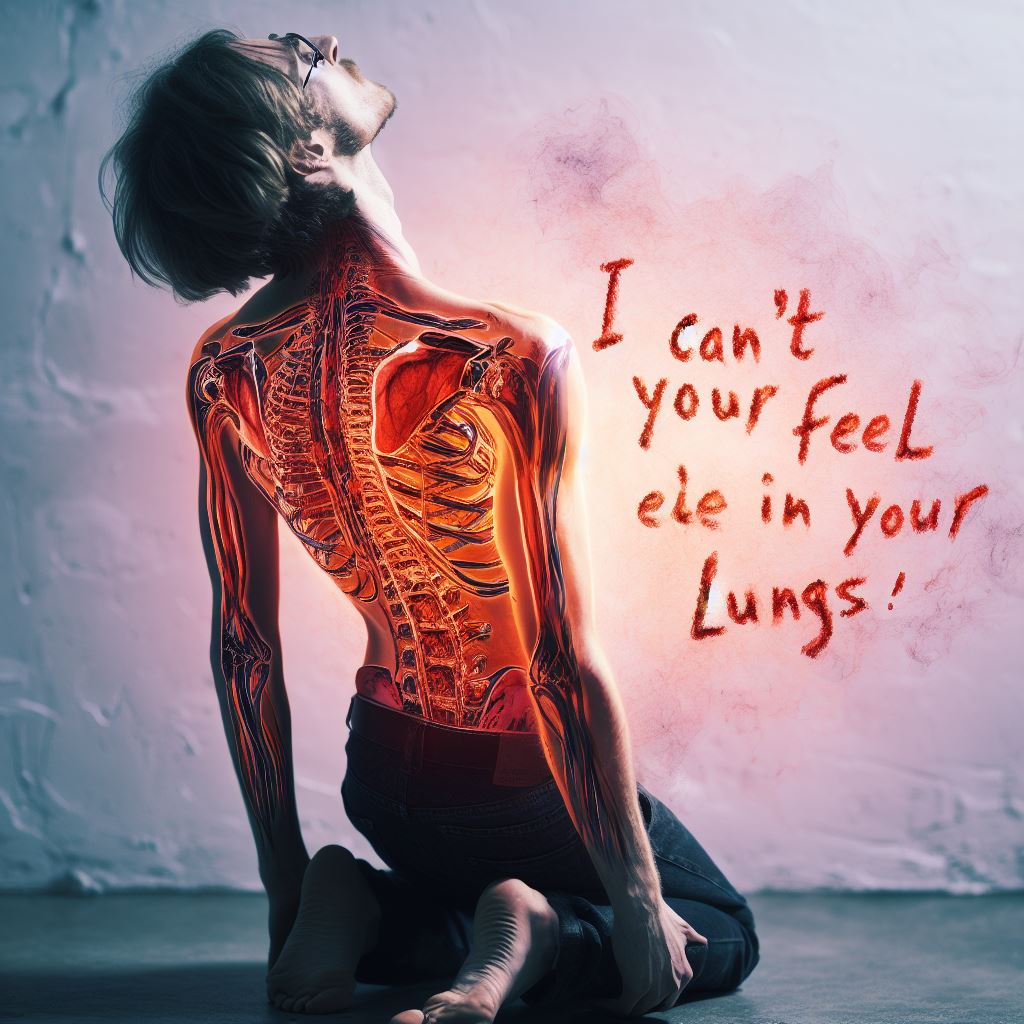

A cooresponding emoji representation:

🤔💭🫁🔄😌

💪🦵🚀⬆️

It's quite nice and lovely!

In the end, we adopted two forms of poem presentation.

1. Emojis (with voice-over, which can also be regarded as a seperate form of presentation. But to simplfy the poem book, we include it into the emoji presentation page.)

2. Painting visualization.

#Reflection

Our model is fairly creative because every time a same input is given, it comes up with different kinds of output. These outputs are structured and can definetly make sense even though they might sometimes be nonsensical. Poems written by humans also have these qualities, which we also call creative. The visualization part of the generator takes advantages of the uniqueness of lovely little emojis and state-of-the-art text-to-image models, which produce decent representation of poems, making it a creative generator rather than a pure text machine.
